# Laboratorio 03 - CNN
Integrantes:
- José Pablo Kiesling Lange, 21581
- Melissa Pérez Alarcón, 21385

### Librerías

In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

### 1. Preparación de datos
- Dividir el conjunto de datos en conjuntos de entrenamiento, validación y prueba.
- Realizar preprocesamiento de las imágenes, como redimensionarlas a un tamaño estándar, normalización, etc.

In [2]:
# Lectura de los datos de entrenamiento, prueba y validación
with open('data/entrenamiento.p', 'rb') as f:
    datos_entrenamiento = pickle.load(f)

with open('data/prueba.p', 'rb') as f:
    datos_prueba = pickle.load(f)

with open('data/validacion.p', 'rb') as f:
    datos_validacion = pickle.load(f)

# Impresión de la cantidad de imágenes en cada conjunto
print(f"Entrenamiento: {len(datos_entrenamiento['features'])} imágenes")
print(f"Prueba: {len(datos_prueba['features'])} imágenes")
print(f"Validación: {len(datos_validacion['features'])} imágenes")

Entrenamiento: 34799 imágenes
Prueba: 12630 imágenes
Validación: 4410 imágenes


In [3]:
# Preprocesamiento de imagenes
#   - Redimensionar a 32x32
#   - Normalizar a valores entre 0 y 1
def preprocesar_imagenes(imagenes):
    imagenes_procesadas = []
    for imagen in imagenes:
        imagen_redimensionada = cv2.resize(imagen, (32, 32))
        imagen_normalizada = imagen_redimensionada / 255.0
        
        imagenes_procesadas.append(imagen_normalizada)
    return np.array(imagenes_procesadas)

# Uso de la función al conjunto de datos
X_train = preprocesar_imagenes(datos_entrenamiento['features'])
X_test = preprocesar_imagenes(datos_prueba['features'])
X_valid = preprocesar_imagenes(datos_validacion['features'])

In [4]:
# Etiquetas para el conjunto de datos
y_train = to_categorical(datos_entrenamiento['labels'], num_classes=43)
y_test = to_categorical(datos_prueba['labels'], num_classes=43)
y_valid = to_categorical(datos_validacion['labels'], num_classes=43)

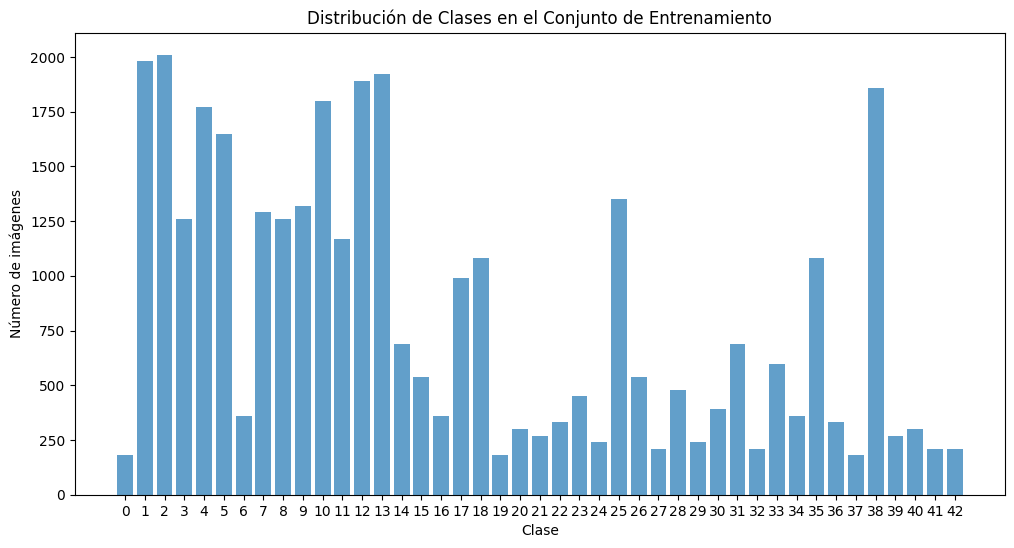

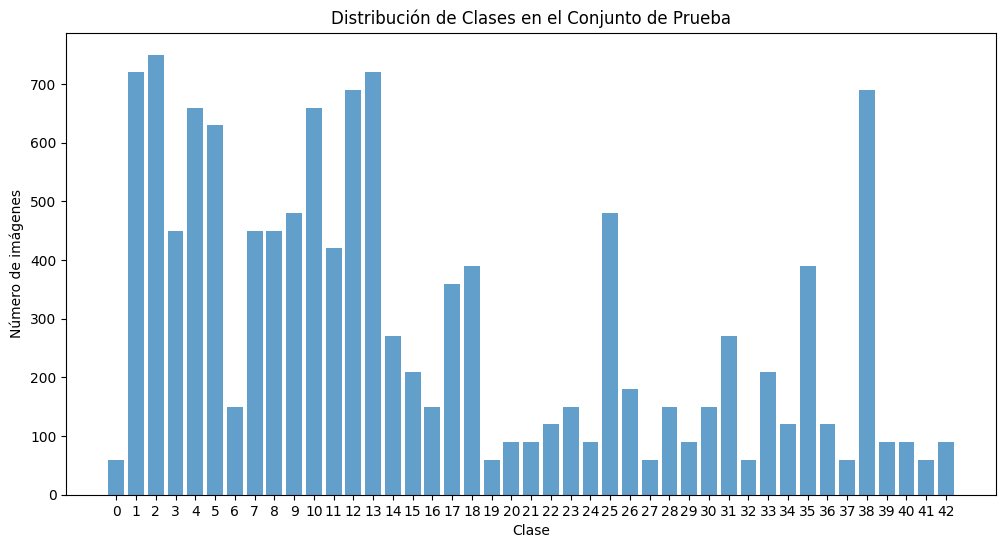

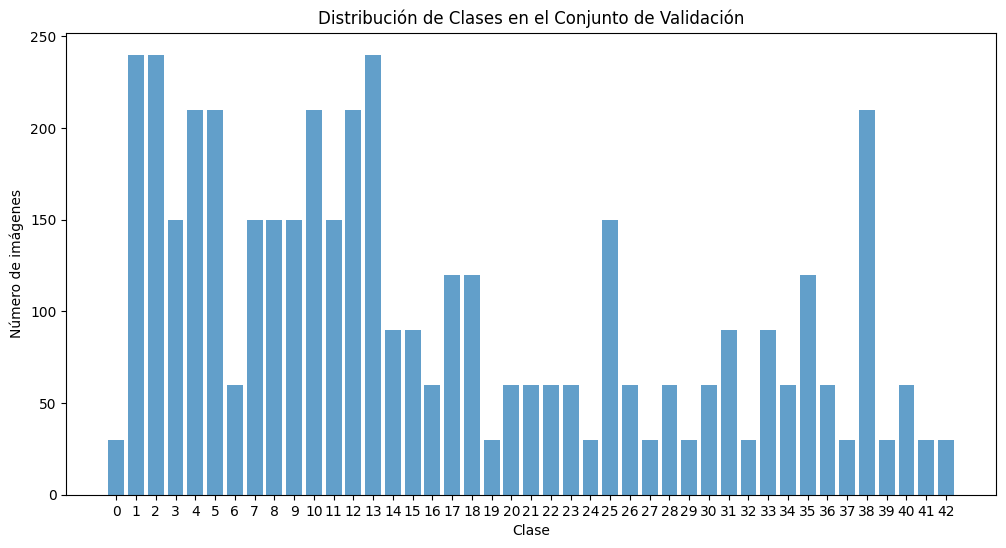

In [5]:
# Distribución de clases
def plot_class_distribution(labels, title):
    plt.figure(figsize=(12, 6))
    unique, counts = np.unique(labels, return_counts=True)
    plt.bar(unique, counts, align='center', alpha=0.7)
    plt.xlabel('Clase')
    plt.ylabel('Número de imágenes')
    plt.title(title)
    plt.xticks(range(43))
    plt.show()

plot_class_distribution(datos_entrenamiento['labels'], 'Distribución de Clases en el Conjunto de Entrenamiento')
plot_class_distribution(datos_prueba['labels'], 'Distribución de Clases en el Conjunto de Prueba')
plot_class_distribution(datos_validacion['labels'], 'Distribución de Clases en el Conjunto de Validación')

**Interpretación de las distribuciones**
- Existe un desbalance en las clases porque existen unas con muchas más imágenes que otras.
- Hay una distribución similar entre los conjuntos, lo cual es positivo porque el modelo verá una distribución de datos similar en cada fase.
- Se podría aplicar un aumento de datos en las imágenes como rotaciones, traslaciones u otros para el conjunto de entrenamiento y así pueda aprender mejor el modelo.

### 2. Implementación de la arquitectura Le-Net
- Presentar la arquitectura Le-Net en detalle, explicando cada capa (convolucional, pooling, fully connected).
- Mostrar el diseño de la red Le-Net utilizando una herramienta de diagramación.
- Explicar el proceso de convolución, función de activación y pooling.

### 3. Construcción del modelo
- Utilizar la biblioteca de aprendizaje profundo TensorFlow para construir la arquitectura Le-Net.
- Definir la estructura de capas convolucionales, capas de pooling y capas fully connected.
- Explicar la importancia de la función de pérdida y el optimizador.

### 4. Entrenamiento del modelo
- Explicar el proceso de entrenamiento de la red neuronal.
- Mostrar cómo cargar los datos de entrenamiento y validación en lotes.
- Definir hiperparámetros como tasa de aprendizaje, número de épocas, tamaño de lote, etc.

### 5. Evaluación del modelo:
- Evaluar el modelo entrenado utilizando el conjunto de prueba.
- Mostrar cómo calcular métricas de evaluación, como Precisión, Recall y F1-Score para cada clase.

### 6. Mejoras y experimentación
- Discutir posibles mejoras en el rendimiento del modelo, como ajuste de hiperparámetros, aumento de datos, regularización, etc.
- Realizar experimentos y ajustes para mejorar el rendimiento del modelo.